In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
samples , features = np.shape(X)
print(samples , features)

100 784


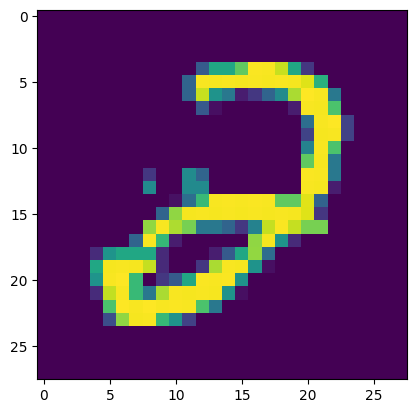

In [3]:
import matplotlib.pyplot as plt
img_55 = X[55].reshape(28,28)
plt.imshow(img_55)



Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.



In [4]:
def mean(X):
    x , y = np.shape(X)
    mean_X = []
    for i in range(y):
        mean_X.append(np.average(X[:,i]))
    mean_X = np.array(mean_X)
    return mean_X

In [5]:
mean_array = mean(X)
X_cen = X - mean_array

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

In [6]:
C = (X_cen.T)@X_cen
C = C/100

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.


In [7]:
eig_val , eig_vect = np.linalg.eig(C)

In [8]:
w1 = eig_vect[:,0]
w2 = eig_vect[:,1]
np.shape(w1)

(784,)

Visualizing the first principal component as an image.

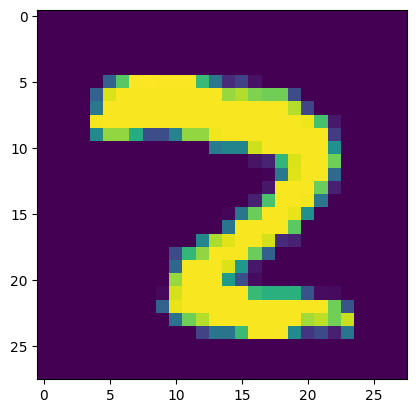

In [9]:
w1_im = X[3]*w1
w1_im = w1_im.reshape(28,28)
plt.imshow(X[3].reshape(28,28))

Finding the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [10]:
eig_val
sum = 0
i = 0
while(sum/np.sum(eig_val)<=.95):
  sum = sum + eig_val[i]
  i=i+1
print('Smallest value of  𝑘 is ',i)

Smallest value of  𝑘 is  53


Given a `test_image`, visualizing the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance

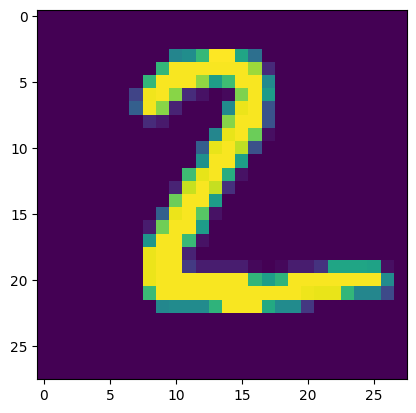

In [11]:
plt.imshow(test_image.reshape(28,28))


In [12]:
#20% of variance
sum = 0
i = 0
while(sum/np.sum(eig_val)<=.2):
  sum = sum + eig_val[i]
  i=i+1
print("For 20% variance k:",i)

For 20% variance k: 2


<ipython-input-13-5cc80f9a2bfa>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(twenty.astype(int))


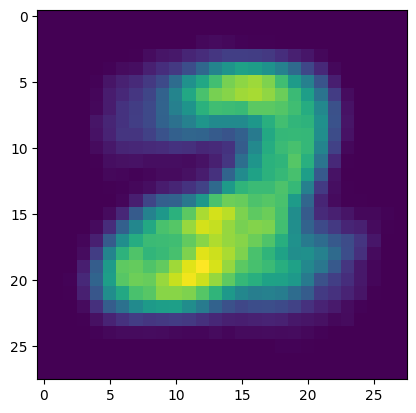

In [13]:
twenty = (test_image-mean_array)*(eig_vect[0]+eig_vect[1])+mean_array
twenty = twenty.reshape(28,28)
plt.imshow(twenty.astype(int))

In [14]:
#50% of variance
sum = 0
i = 0
while(sum/np.sum(eig_val)<=.5):
  sum = sum + eig_val[i]
  i=i+1
print("For 50% variance k:",i)

For 50% variance k: 6


<ipython-input-15-26e23b3a4f86>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(fifty.astype(int))


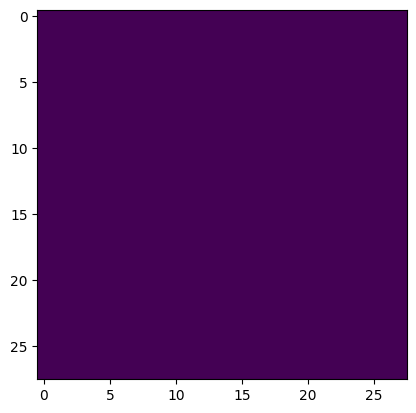

In [15]:
eig50 = 0
for i in range(6):
  eig50 = eig50 + eig_vect[i]
fifty = test_image*(eig50)
fifty = fifty.reshape(28,28)
plt.imshow(fifty.astype(int))

In [16]:
#80% of variance
sum = 0
i = 0
while(sum/np.sum(eig_val)<=.8):
  sum = sum + eig_val[i]
  i=i+1
print("For 80% variance k:",i)

For 80% variance k: 22


<ipython-input-17-a9896571eba6>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(fifty.astype(int))


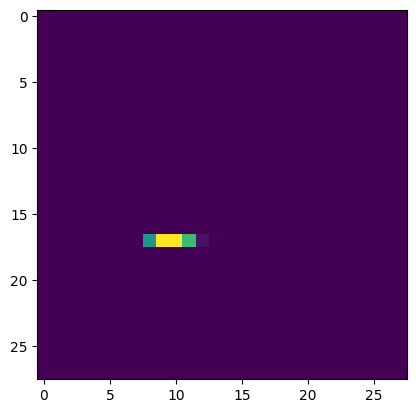

In [17]:
eig80 = 0
for i in range(22):
  eig80 = eig80 + eig_vect[i]
fifty = test_image*(eig80)
fifty = fifty.reshape(28,28)
plt.imshow(fifty.astype(int))

In [18]:
#95% of variance
sum = 0
i = 0
while(sum/np.sum(eig_val)<=.95):
  sum = sum + eig_val[i]
  i=i+1
print("For 95% variance k:",i)

For 95% variance k: 53


<ipython-input-19-ec54a26b5b95>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.rint(fifty).astype(int))


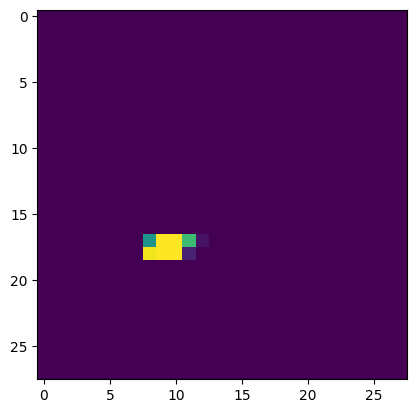

In [19]:
eig95 = 0
for i in range(53):
  eig95 = eig95 + eig_vect[i]
fifty = test_image*(eig95)
fifty = fifty.reshape(28,28)
plt.imshow(np.rint(fifty).astype(int))